# 9. 입출력

## 9.1 학습내용

### 9.1.1 목표

* 화면에 형식을 맞추어 출력할 수 있다.
* 화면에서 사용자 입력을 받을 수 있다.
* 파일에서 읽어올 수 있다.
* 파일에 출력할 수 있다.

### 9.1.2 문제

* 문제 io-1: 사용자가 화면에 원의 반지름을 입력하고, 면적을 출력하기  
* 문제 io-2: 파일에서 내용을 읽어 화면에 출력하기
* 문제 io-3: 파일에서 읽어서 소문자로 만들기
* 문제 io-4: 파일에 쓰기

## 9.2 java.io 

* 자바에서 입출력은 읽는 방식, 바이트 또는 텍스트에 따라 구분할 수 있다.
    * 입력은 데이터를 읽는 것을 말한다. 화면, 메모리, 다른 프로그램, 파일과 같은 출처에서 읽는다.
    * 출력은 데이터를 쓰는 것을 말한다. 입력출처와 같은 요소에 쓴다.
    * 바이트는 8비트 단위를 기본으로 입출력을 한다.
    * 텍스트는 바이트를 인코딩하는 방식을 정해서, 보통 'utf-8' 문자열로 입출력을 한다.

구분 | 입력 | 출력
-----|-----|-----
바이트 | InputStream | OutputStream
문자 | Reader | Writer

* 자바의 입출력은 io 패키지에서 처리한다. 기본 기능은 다음 클래스에서 제공한다.
* 이들은 추상클래스라서 직접 사용할 수 없다는 점을 유의한다.
    * java.io.InputStream
        * 바이트 단위로 읽음
        * binary IO 오디오, 비디오 등 바이너리 파일을 읽을 경우
        * Scanner에서 InputStream (System.in 필드의 객체 참조)을 사용한다.
    * java.io.OutputStream
        * 바이트 단위로 출력
        * System.out은 OutputStream을 상속한 PrintStream을 사용한다.
    * java.io.Reader
        * 문자 단위로 읽는다 (character)
    * java.io.Writer
        * 문자 단위로 쓴다 (character)

* System 클래스 다이어그램

In [1]:
import iplantuml

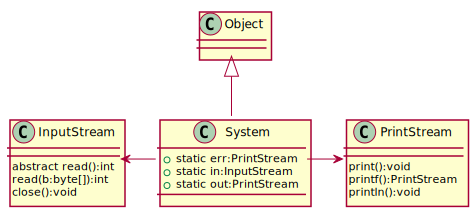

In [3]:
%%plantuml
@startuml
class Object
class System {
    +static err:PrintStream
    +static in:InputStream
    +static out:PrintStream
}
class java.io.InputStream {
    abstract read():int
    read(b:byte[]):int
    close():void
}
class java.io.PrintStream {
    print():void
    printf():PrintStream
    println():void
}
Object <|-- System
System -left-> java.io.InputStream
System -right-> java.io.PrintStream

@enduml

## 9.3 I/O Stream

* 클래스 System에는 'err', 'in', 'out' 참조를 사용할 수 있다.
    * err, out은 PrintStream을 사용하여 출력할 수 있다.
    * in은 InputStream을 사용하여 입력할 수 있다.

### 9.3.1 System.out

* System 클래스의 out 필드 (PrintStream 객체의 참조 필드)를 사용해 데이터(바이트)를 print()

In [4]:
System.out.println((float)Math.PI)

 System.out.println((float)Math.PI)
3.1415927



* format

    ```
    format("%.2f",Math.PI)
    ```

In [47]:
float pi=(float)Math.PI;
System.out.println(pi)

 float pi=(float)Math.PI;
|  Added variable pi of type float with initial value 3.1415927

 System.out.println(pi)
3.1415927



In [2]:
import java.util.Formatter
StringBuilder sb = new StringBuilder();
Formatter formatter = new Formatter(sb, Locale.US);
formatter.format("Hello %s", "jsl");
System.out.println(formatter + " locale: " + formatter.locale());

 import java.util.Formatter

 StringBuilder sb = new StringBuilder();
|  Modified variable sb of type StringBuilder with initial value 
|    Update overwrote variable sb

 Formatter formatter = new Formatter(sb, Locale.US);
|  Modified variable formatter of type Formatter with initial value 
|    Update overwrote variable formatter

 formatter.format("Hello %s", "jsl");
|  Expression value is: Hello jsl
|    assigned to temporary variable $9 of type Formatter

 System.out.println(formatter + " locale: " + formatter.locale());
Hello jsl locale: en_US



In [3]:
String pi=String.format("%.2f",123.456);

 String pi=String.format("%.2f",123.456);
|  Added variable pi of type String with initial value "123.46"



### 9.3.2 System.in

* System 클래스의 in 필드(InputStream 객체의 참조 필드)를 사용해 데이터(바이트)를 read()

* Scanner를 사용해서 System.in 데이터를 읽을 수 있다.
    * File, InputStream, Path과 같은 입력에서 데이터를 읽음
    * Iterator를 구현한다. 단 문자열 String을 가진다.


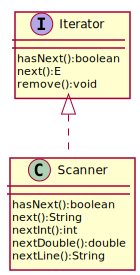

In [2]:
%%plantuml
@startuml
class Scanner {
    hasNext():boolean
    next():String
    nextInt():int
    nextDouble():double
    nextLine():String
}
interface Iterator {
    hasNext():boolean
    next():E
    remove():void
}
Iterator <|.. Scanner
@enduml

* Scanner를 사용해서 System.in에서 읽기

In [ ]:
Scanner sc = new Scanner(System.in);
String line=sc.nextLine();

## 문제 io-1: 사용자가 원의 반지름을 입력하고, 면적을 출력하기 

In [ ]:
# %load src/com/sd/gui/CalcAreaMain.java
package com.sd.gui;

import java.util.Scanner;

public class CalcAreaMain {
    public static void main(String[] args) {
        Scanner sc = new Scanner(System.in);
        System.out.print("반지름을 입력하세요: ");
        double r = sc.nextDouble();
        double area=Math.PI*Math.pow(r,2);
        System.out.printf("반지름: %.2f 원의 면적:%.2f\n",r,area);
    }
}


## 문제 io-2: 파일에서 내용을 읽어 화면에 출력하기 

* Scanner를 사용해서 file에서 읽기
* 한 줄만 읽어오기.

In [1]:
import java.util.Scanner;

Scanner f=new Scanner(new File("test.txt"));
String line = f.nextLine();
System.out.println(line);

 import java.util.Scanner;

 

 Scanner f=new Scanner(new File("test.txt"));
|  Added variable f of type Scanner with initial value java.util.Scanner[delimiters=\p{javaWhitespace}+][position=0][match valid=false][need input=false][source closed=false][skipped=false][group separator=\,][decimal separator=\.][positive prefix=][negative prefix=\Q-\E][positive suffix=][negative suffix=][NaN string=\QNaN\E][infinity string=\Q∞\E]

 String line = f.nextLine();
|  Added variable line of type String with initial value "buffer test"

 System.out.println(line);
buffer test



* while문을 사용하여 파일 전체를 읽는다.
* Scanner는 iterator이다. hasNext()를 사용해 파일의 끝에 도달했는지 알 수 있다.

In [8]:
import java.util.Scanner;

Scanner sc=new Scanner(new File("test.txt"));
while(sc.hasNext()) {
    String line = sc.nextLine();
    System.out.println(line);
}
sc.close();

 import java.util.Scanner;

 

 Scanner sc=new Scanner(new File("test.txt"));
|  Modified variable sc of type Scanner with initial value java.util.Scanner[delimiters=\p{javaWhitespace}+][position=0][match valid=false][need input=false][source closed=false][skipped=false][group separator=\,][decimal separator=\.][positive prefix=][negative prefix=\Q-\E][positive suffix=][negative suffix=][NaN string=\QNaN\E][infinity string=\Q∞\E]
|    Update overwrote variable sc

 while(sc.hasNext()) {
     String line = sc.nextLine();
     System.out.println(line);
 }
THIS is uppcase

 sc.close();



## 9.4 파일

* Reader, Writer 클래스를 상속하여 사용한다.
* FileReader, FileWriter는 파일에서 문자 단위로 (바이트가 아니라) 읽고, 쓴다.

### 9.4.1 파일 읽기

* java.io.FileReader를 사용하여 문자를 읽을 수 있다.
* java.io.BufferedReader와 같은 확장된 기능은 decorator를 사용한다. 문자를 buffer단위로 읽기 때문에 빠르다.


구분 | FileReader | BufferedReader
-------|-------|-------
읽는 단위 | 문자 하나씩 | 문자를 일정 단위로 묶어서 buffer 단위로
EOF | -1 | null

* 문자를 읽어오는 경우, EOF (End Of File)
    * 문자를 읽어 오는 경우, 문자 값은 0 to 65535 (0x00-0xffff)의 범위에 있다.
    * 파일 끝에 도달하면 -1 값을 가진다.


In [18]:
class FileRead {
    public static void main(String args[]) throws Exception {
        FileReader fr=new FileReader("test.txt");
        int i;
        while((i=fr.read()) !=-1)
            System.out.println((char)i);
        fr.close();
    }
}

 class FileRead {
     public static void main(String args[]) throws Exception {
         FileReader fr=new FileReader("test.txt");
         int i;
         while((i=fr.read()) !=-1)
             System.out.println((char)i);
         fr.close();
     }
 }
|  Added class FileRead



* BufferedReader 클래스를 사용한다.
    * EOF는 null이 된다.

In [4]:
File f=new File("test.txt");
FileReader fr = new FileReader(f); 
BufferedReader br = new BufferedReader(fr); 
String s; 
while((s = br.readLine()) != null) { 
    System.out.println(s); 
} 
fr.close();

 File f=new File("test.txt");
|  Modified variable f of type File with initial value test.txt
|    Update overwrote variable f

 FileReader fr = new FileReader(f); 
|  Modified variable fr of type FileReader with initial value java.io.FileReader@6fd02e5
|    Update overwrote variable fr

 BufferedReader br = new BufferedReader(fr); 
|  Modified variable br of type BufferedReader with initial value java.io.BufferedReader@5bcab519
|    Update overwrote variable br

 String s; 
|  Modified variable s of type String
|    Update overwrote variable s

 while((s = br.readLine()) != null) { 
     System.out.println(s); 
 } 
THIS is uppcase

 fr.close();



## 문제 io-3: 파일에서 읽어서 소문자로 출력하기

* 클래스 BufferedReader를 사용해서, 파일 test.txt를 읽는다.
* 파일 내용을 소문자로 변환하고 화면에 출력한다.

* 파일 I/O오류가 발생할 수 있다. 예를 들면, 파일이 존재하지 않는 경우 오류가 발생한다.

In [5]:
String FiletoLower() {
    File f=new File("test.txt");
    FileReader fr = new FileReader(f); 
    BufferedReader br = new BufferedReader(fr); 
    String s; 
    while((s = br.readLine()) != null) { 
        System.out.println(s.toLowerCase()); 
    } 
    fr.close();
}

 String FiletoLower() {
     File f=new File("test.txt");
     FileReader fr = new FileReader(f); 
     BufferedReader br = new BufferedReader(fr); 
     String s; 
     while((s = br.readLine()) != null) { 
         System.out.println(s.toLowerCase()); 
     } 
     fr.close();
 }
|  Error:
|  missing return statement
|  String FiletoLower() {
|                       ^
|  Error:
|  unreported exception java.io.FileNotFoundException; must be caught or declared to be thrown
|      FileReader fr = new FileReader(f);
|                      ^---------------^
|  Error:
|  unreported exception java.io.IOException; must be caught or declared to be thrown
|      while((s = br.readLine()) != null) {
|                 ^-----------^
|  Error:
|  unreported exception java.io.IOException; must be caught or declared to be thrown
|      fr.close();
|      ^--------^



* try-catch문을 넣어 예외의 발생을 처리한다.

In [15]:
void file2Lower() {
    try {
        File f=new File("test.txt");
        FileReader fr = new FileReader(f); 
        BufferedReader br = new BufferedReader(fr); 
        String s; 
        while((s = br.readLine()) != null) { 
            System.out.println(s.toLowerCase()); 
        } 
        fr.close();
    } catch (IOException e) {
        System.out.println("IOException : " + e);
    }
}

 void file2Lower() {
     try {
         File f=new File("test.txt");
         FileReader fr = new FileReader(f); 
         BufferedReader br = new BufferedReader(fr); 
         String s; 
         while((s = br.readLine()) != null) { 
             System.out.println(s.toLowerCase()); 
         } 
         fr.close();
     } catch (IOException e) {
         System.out.println("IOException : " + e);
     }
 }
|  Added method file2Lower()



In [16]:
file2Lower();

 file2Lower();
this is uppcase



### 9.4.2 파일 쓰기

* Writer를 사용하여 문자를 쓸 수 있다.

FileWriter | BufferedWriter
-------|-------
문자 하나씩 | 문자를 일정 단위로 묶어서 buffer 단위로

In [19]:
FileWriter file = new FileWriter("test.txt");
file.write("test");
file.close();

 FileWriter file = new FileWriter("test.txt");
|  Added variable file of type FileWriter with initial value java.io.FileWriter@5cb9f472

 file.write("test");

 file.close();



In [20]:
FileWriter file = new FileWriter("test.txt");
BufferedWriter bf = new BufferedWriter(file);
bf.write("buffer test");
bf.close();

 FileWriter file = new FileWriter("test.txt");
|  Modified variable file of type FileWriter with initial value java.io.FileWriter@4566e5bd
|    Update overwrote variable file

 BufferedWriter bf = new BufferedWriter(file);
|  Added variable bf of type BufferedWriter with initial value java.io.BufferedWriter@ff5b51f

 bf.write("buffer test");

 bf.close();



## 문제 io-4: 파일에 쓰기

* 파일에 다음 내용을 쓴다.
* 예외처리를 한다.

```
I love to travel.
The cities I have visited:
    - Seoul
    - New York
    - Sydney
```

In [4]:
import java.io.*;

class FileUtil {
    public void writeFile() {
        try{
            FileWriter fw=new FileWriter("travel.txt");
            fw.write("I love to travel.\n");
            fw.write("The cities I have visited:\n");
            fw.write("\t- Seoul\n");
            fw.write("\t- New York\n");
            fw.write("\t- Sydney\n");
            fw.close();
        } catch(Exception e) {
            System.out.println(e);
        }
        System.out.println("done");
    }
}

 import java.io.*;

 

 class FileUtil {
     public void writeFile() {
         try{
             FileWriter fw=new FileWriter("travel.txt");
             fw.write("I love to travel.\n");
             fw.write("The cities I have visited:\n");
             fw.write("\t- Seoul\n");
             fw.write("\t- New York\n");
             fw.write("\t- Sydney\n");
             fw.close();
         } catch(Exception e) {
             System.out.println(e);
         }
         System.out.println("done");
     }
 }
|  Modified class FileUtil
|    Update overwrote class FileUtil



In [5]:
FileUtil fu=new FileUtil();
fu.writeFile();

 FileUtil fu=new FileUtil();
|  Added variable fu of type FileUtil with initial value FileUtil@57fffcd7

 fu.writeFile();
done



# 10. 예외

## 10.1 학습내용

### 10.1.1 목표

* 프로그램에서 발생하는 예외를 처리할 수 있다.

### 10.1.2 문제

* 문제 x-1: 파일을 읽어서 출력하는 경우, 존재하지 않아 발생하는 예외 처리
* 문제 x-2: 커피를 내리려고 한다. 커피가 없는 경우 예외로 처리하기.

## 10.2 프로그램 오류와 예외

* 어떤 프로그램이나 정상적으로 처리할 수 없는 경우가 발생할 수 있다.
* 비정상적인 경우는 (1) 오류, (2) 처리하는 구문이 필요한 예외, 그리고 (3)처리하는 구문이 필요없는 예외로 나누어 볼 수 있다.

### 10.2.1 오류

* 오류는 프로그램이 컴파일 되지 않거나, 실수로 인해 프로그램이 다른 결과가 나오는 버그bug를 말한다.


* 정수에 소수를 넣으면 '오류'가 발생한다.
* 이러한 오류는 프로그래밍을 잘 못한 것이므로, '실수'라고 해야 옳다.

In [17]:
int x=1.1;

 int x=1.1;
|  Error:
|  incompatible types: possible lossy conversion from double to int
|  int x=1.1;
|        ^-^



* 1~100의 합계는 5050이다. 결과가 4950으로 출력된 것은 100이 제외된 오류이다.

In [18]:
int sum=0;
for(int i=0;i<100;i++)
    sum+=i;
System.out.print(sum);

 int sum=0;
|  Added variable sum of type int with initial value 0

 for(int i=0;i<100;i++)
     sum+=i;

 System.out.print(sum);
4950


### 10.2.2 처리하는 구문이 필요없는 예외


* 다음 예외를 발생시켜 본다. 이들은 컴파일 시점에 예방할 수 있는 오류로서, 처리하는 구문이 필요없다.

예외 | 설명
-----|-----
ArithmeticException | 연산 예외
IndexOutOfBoundsException | 배열의 예외
NullPointerException | 객체 참조 예외
ClassCastException | 형변환 예외
    

* ArithmeticException
    * 0으로 나누면 예외가 발생한다.
    * 0으로 나누면 안된다는 것을 알고 있다. 하지 말아야 할 '실수'이다.

In [4]:
1/0;

 1/0;
|  java.lang.ArithmeticException thrown: / by zero
|        at (#13:1)



* 프로그램이 실행되면서, '0'으로 나누어지게 되는 경우가 있을 수 있다. 그러면 예외가 발생한다.
* 변수 n을 초기화하지 않으면, 0을 가지게 된다. 초기화하지 않은 변수로 '의도하지 않게' 나누는 경우는 예외가 발생한다.
* 이런 점에서는 오류bug이기는 하지만, 실행과정에서 발생할 수 있다는 점에서 다르다.

In [3]:
int n;
1/n;

 int n;
|  Modified variable n of type int
|    Update overwrote variable n

 1/n;
|  java.lang.ArithmeticException thrown: / by zero
|        at (#12:1)



* 배열을 사용하여, 예외를 발생해 본다.
* 배열을 3개 선언한 후, 4번째를 출력하면 'ArrayIndexOutOfBoundsException'가 발생한다.

In [10]:
int[] a=new int[3];
System.out.print(a[3]);

 int[] a=new int[3];
|  Modified variable a of type int[] with initial value [I@3159c4b8
|    Update overwrote variable a

 System.out.print(a[3]);
|  java.lang.ArrayIndexOutOfBoundsException thrown: 3
|        at (#18:1)



* 함수를 만들면, 호출하기 전까지는 예외는 발생하지 않는다.
* 예외가 발생할 경우, 처리하는 구문을 넣지 않아도 된다.

In [12]:
void arrayPrint() {
    int[] a=new int[3];
    System.out.print(a[3]);
}

 void arrayPrint() {
     int[] a=new int[3];
     System.out.print(a[3]);
 }
|  Modified method arrayPrint()
|    Update overwrote method arrayPrint()



In [11]:
arrayPrint();

 arrayPrint();
|  java.lang.ArrayIndexOutOfBoundsException thrown: 3
|        at arrayPrint (#17:3)
|        at (#19:1)



* NullPointerException을 발생해 본다.
    * 객체를 선언한 후, 생성하여 할당하지 않은 경우 발생하는 예외이다.
    * 아래와 같이 n에 객체를 생성하여 할당한 후 toString()을 사용할 수 있다.
        ```
        Integer n=new Integer(1);
        n.toString();
        ```

* 객체를 선언하기만 하고, 사용는 경우 'NullPointerException'이 발생한다.

In [25]:
Integer n;
n.toString()

 Integer n;
|  Added variable n of type Integer

 n.toString()
|  java.lang.NullPointerException thrown
|        at (#31:1)



* ClassCastException
    * 수를 문자로의 형 변환은 데이터 타잎이 다른 오류가 발생한다.
    * 수와를 Object로 변환한 후, 문자로 형 변환하면 예외가 발생한다.

In [32]:
Integer n = Integer.valueOf(1);
String s = (String)n;

 Integer n = Integer.valueOf(1);
|  Modified variable n of type Integer with initial value 1
|    Update overwrote variable n

 String s = (String)n;
|  Error:
|  incompatible types: java.lang.Integer cannot be converted to java.lang.String
|  String s = (String)n;
|                     ^



In [33]:
Object o = Integer.valueOf(1);
String s = (String)o;

 Object o = Integer.valueOf(1);
|  Added variable o of type Object with initial value 1

 String s = (String)o;
|  java.lang.ClassCastException thrown: java.lang.Integer (in module: java.base) cannot be cast to java.lang.String (in module: java.base)
|        at (#34:1)



### 10.2.2 처리하는 구문이 필요한 예외

* 입출력은 여러 오류가 발생할 수 있다.
* 파일의 예외를 발생해 본다.
    * FileNotFoundException

In [8]:
File f=new File("noname.txt");
FileReader fr=new FileReader(f);

 File f=new File("noname.txt");
|  Modified variable f of type File with initial value noname.txt
|    Update overwrote variable f

 FileReader fr=new FileReader(f);
|  java.io.FileNotFoundException thrown: noname.txt (No such file or directory)
|        at FileInputStream.open0 (Native Method)
|        at FileInputStream.open (FileInputStream.java:195)
|        at FileInputStream.<init> (FileInputStream.java:138)
|        at FileReader.<init> (FileReader.java:72)
|        at (#15:1)
|    Update overwrote variable fr



* 함수를 만들어서 예외를 발생한다. 처리하는 구문이 필요하다.

In [15]:
void fileOpen() {
    File f=new File("noname.txt");
    FileReader fr=new FileReader(f);
}

 void fileOpen() {
     File f=new File("noname.txt");
     FileReader fr=new FileReader(f);
 }
|  Error:
|  unreported exception java.io.FileNotFoundException; must be caught or declared to be thrown
|      FileReader fr=new FileReader(f);
|                    ^---------------^
|    Update overwrote method fileOpen()



## 10.3 예외의 구분

* 프로그램이 비정상적으로 종료하는 경우를 예외 (Exception)라고 한다.
* 예외를 구분하면:
    * RuntimeException
        * 'ArrayIndexOutOfBoundsException'과 같은 예외
        * 프로그램에서 예방할 수 있는 예외
        * unchecked exceptions, 프로그램 내에서 분명하게 처리하는 구문이 필요하지 않다.
    * Exception
        * 'FileNotFoundException'과 같은 예외
        * 프로그램에서 예방할 수 없는 예외. 파일이 존재하도록 프로그램해도 다른 이유로 삭제되거나 이동되었을 수 있다.
        * checked exceptions, 예외를 분명하게 처리하는 구문이 필요하다.
            * try/catch 문
            * 또는 함수에 throw를 선언해야 한다.

구분 | 설명 | 예
-------|-------|-------
Error | 프로그램에서 발생하는 오류 | OutOfMemoryError
RuntimeException | 프로그램으로 예방할 수 있는 오류. unchecked exceptions | IndexOutOfBoundsException
RuntimeException을 제외한 Exception | 프로그램으로 예방할 수 없는 예외. checked exceptions | IOException

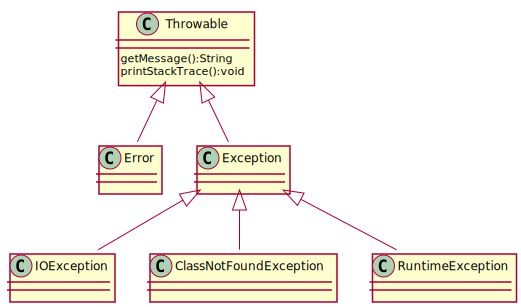

In [3]:
%%plantuml
@startuml
class Throwable {
    getMessage():String
    printStackTrace():void
}
class Error
class Exception
class IOException
class ClassNotFoundException
class RuntimeException
Throwable <|-- Error
Throwable <|-- Exception
Exception <|-- IOException
Exception <|-- ClassNotFoundException
Exception <|-- RuntimeException
@enduml

```
java.lang:
    ArithmeticException
    ArrayIndexOutOfBoundsException
    ClassCastException
    ClassNotFoundException
    IllegalArgumentExcepion
    IndexOutOfBoundsException
    NullPointerException
    NumberFormatedException

java.io :
    EOFException
    FileNotFoundException
    IOException
```

### 10.4 예외의 처리

* 위에 설명한 바와 같이, RuntimException은 처리하는 구문이 필요없다.
    ```
    ArithmeticException
    IndexOutOfBoundsException
    NullPointerException
    ClassCastException
    ```

* RuntimeException을 제외한 Exception은 처리하는 구문이 필요하다.

* try catch로 checked exception을 처리
* checked exception은 컴파일하는 시점에 오류의 발생을 확인?

In [19]:
try {
    File f=new File("noname.txt");
    FileReader fr=new FileReader(f);
} catch (FileNotFoundException e) {
    
}

 try {
     File f=new File("noname.txt");
     FileReader fr=new FileReader(f);
 } catch (FileNotFoundException e) {
     
 }



* throws로 checked exception을 처리

In [20]:
void fileOpen() throws FileNotFoundException {
    File f=new File("noname.txt");
    FileReader fr=new FileReader(f);
}

 void fileOpen() throws FileNotFoundException {
     File f=new File("noname.txt");
     FileReader fr=new FileReader(f);
 }
|  Added method fileOpen()



* finally

## 문제 x-1: 파일을 읽어서 출력하는 경우, 존재하지 않아 발생하는 예외 처리

In [ ]:
import java.io.File;
import java.io.FileReader;
import java.io.IOException;
public class PrintFile {
    public void print() throws FileNotFoundException {
        File f=new File("noname.txt");
        FileReader fr=new FileReader(f);
        
    }
}

In [ ]:
package com.sd.io;

import java.io.File;
import java.io.FileReader;
import java.io.IOException;
public class PrintFile {
	public void print() {
		try {
			File f=new File("noname.txt");
			FileReader fr=new FileReader(f);
			fr.close();
		} catch (IOException e) {
			e.printStackTrace();
		}
	}
}

## 10.5 예외 만들어 보기

* 자바의 예외에 필요한 예외를 추가할 수 있다.
* 이 경우, Exception을 확장한다.
    ```
    class HelloException extends Exception
    ```



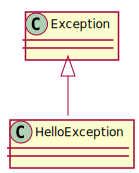

In [4]:
%%plantuml
@startuml
class Exception
Exception <|-- HelloException
@enduml

* getMessage()는 Trowable 클래스에서 상속받는 함수이다.

In [1]:
class HelloException extends Exception {
    public HelloException(String e) {
        super(e);
    }
    public String getMessage() {
        return super.getMessage();
    }
}

 class HelloException extends Exception{
     public HelloException(String e) {
         super(e);
     }
     public String getMessage() {
         return super.getMessage();
     }
 }
|  Added class HelloException



* 함수에 예외를 선언할 수 있다.

In [2]:
void sayHello(String name) throws HelloException {
    System.out.println("Hello "+name);
    throw new HelloException("Hello Exception...");
}

 void sayHello(String name) throws HelloException {
     System.out.println("Hello "+name);
     throw new HelloException("Hello Exception...");
 }
|  Added method sayHello(String)



* try-catch문을 사용할 수 있다.

In [3]:
try {
    sayHello("jsl");
} catch(HelloException e) {
    System.out.println(e.getMessage());
}

 try {
     sayHello("jsl");
 } catch(HelloException e) {
     System.out.println(e.getMessage());
 }
Hello jsl
Hello Exception...



## 문제 x-2: 커피를 내리려고 한다. 커피가 없는 경우 예외로 처리하기.

* 커피 클래스를 구현한다.
* 커피가 없는 경우 NoCoffeeException을 발생한다.

* NoCoffeeException은 Exception을 확장한다.

In [7]:
class NoCoffeeException extends Exception{
    public NoCoffeeException(String e) {
        super(e);
    }
    public String getMessage() {
        System.out.println("Get coffee!");
        return super.getMessage();
    }
}

 class NoCoffeeException extends Exception{
     public NoCoffeeException(String e) {
         super(e);
     }
     public String getMessage() {
         System.out.println("Get coffee!");
         return super.getMessage();
     }
 }
|  Modified class NoCoffeeException
|    Update overwrote class NoCoffeeException



* Coffee 클래스의 brew()에 NoCoffeeException을 선언한다.

In [8]:
class Coffee {
    void brew() throws NoCoffeeException {
        System.out.println("Brewing...");
        throw new NoCoffeeException("No Coffee Exception...");
    }
}

 class Coffee {
     void brew() throws NoCoffeeException {
         System.out.println("Brewing...");
         throw new NoCoffeeException("No Coffee Exception...");
     }
 }
|  Added class Coffee



In [9]:
Coffee c=new Coffee();
c.brew();

 Coffee c=new Coffee();
|  Added variable c of type Coffee with initial value Coffee@e45f292

 c.brew();
Brewing...
Get coffee!
Get coffee!
|  REPL.$REPL12$NoCoffeeException thrown: No Coffee Exception...
|        at Coffee.brew (#13:4)
|        at (#15:1)

